# Projet Machine-Learning par Antoine Théologien

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from module import *
from loss import *
from mltools import *

def train_nn(X, y, model, loss, epochs=1000, lr=0.01, batch_size=32, verbose=True):
    losses = []
    n_samples = X.shape[0]
    
    for epoch in range(epochs):
        permutation = np.random.permutation(n_samples)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]
        
        epoch_loss = 0
        
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            y_pred = model.forward(X_batch)
            batch_loss = np.mean(loss.forward(y_batch, y_pred))
            epoch_loss += batch_loss * X_batch.shape[0] / n_samples
            
            model.zero_grad()
            model.backward(X_batch, y_batch, loss)
            model.update_parameters(lr)
        
        losses.append(epoch_loss)
        
        if verbose and epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {epoch_loss:.4f}")

    return losses, model


Epoch 0: Loss = 0.4741
Epoch 100: Loss = 0.0003
Epoch 200: Loss = 0.0002
Epoch 300: Loss = 0.0001
Epoch 400: Loss = 0.0001
Epoch 500: Loss = 0.0001
Epoch 600: Loss = 0.0001
Epoch 700: Loss = 0.0000
Epoch 800: Loss = 0.0000
Epoch 900: Loss = 0.0000


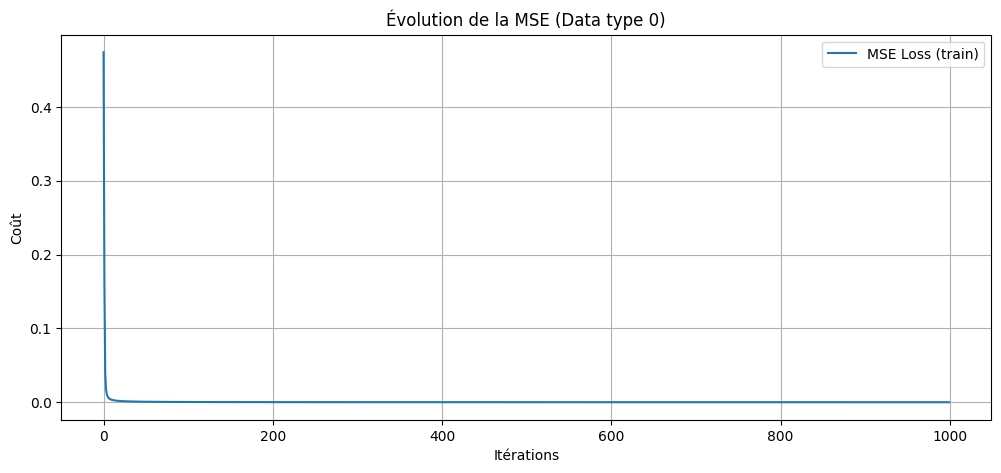

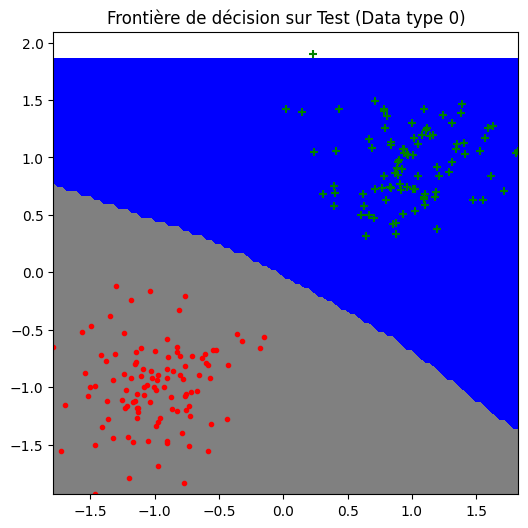

Test Loss (Data type 0): 0.0000
Epoch 0: Loss = 0.3723
Epoch 100: Loss = 0.0121
Epoch 200: Loss = 0.0040
Epoch 300: Loss = 0.0027
Epoch 400: Loss = 0.0020
Epoch 500: Loss = 0.0016
Epoch 600: Loss = 0.0014
Epoch 700: Loss = 0.0012
Epoch 800: Loss = 0.0010
Epoch 900: Loss = 0.0009


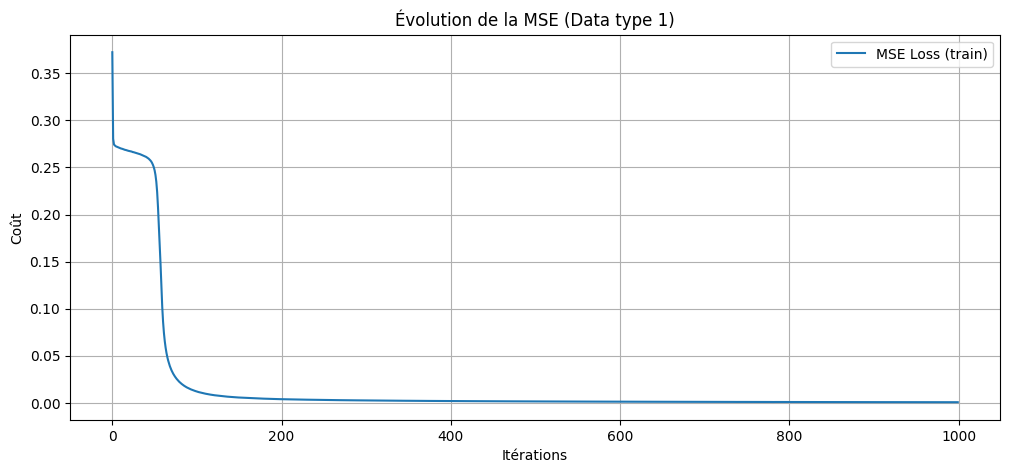

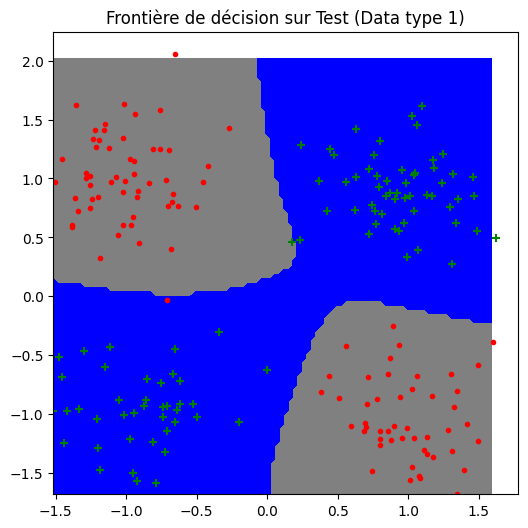

Test Loss (Data type 1): 0.0051
Epoch 0: Loss = 0.4908
Epoch 100: Loss = 0.2393
Epoch 200: Loss = 0.2364
Epoch 300: Loss = 0.2357
Epoch 400: Loss = 0.2358
Epoch 500: Loss = 0.2345
Epoch 600: Loss = 0.2348
Epoch 700: Loss = 0.2338
Epoch 800: Loss = 0.2336
Epoch 900: Loss = 0.2328


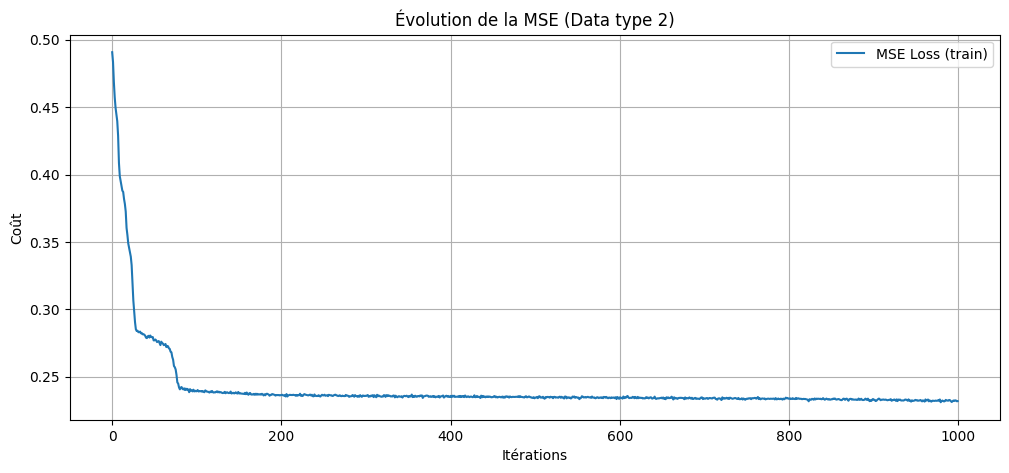

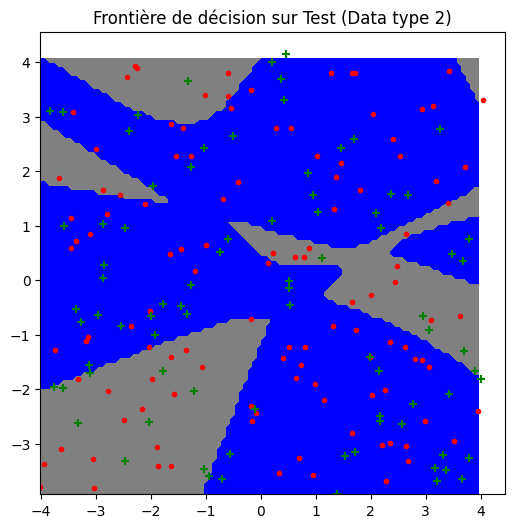

Test Loss (Data type 2): 0.2425


In [2]:
network = Sequentiel(
    Linear(2, 5),
    TanH(),
    Linear(5, 5),
    TanH(),
    Linear(5,1),
    Sigmoide()
)

for i in [0, 1, 2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = np.where(datay == -1, 0, 1).reshape((-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)

    model = network
    loss = MSELoss()

    losses, trained_model = train_nn(X_train, y_train, model, loss, epochs=1000, lr=0.1, batch_size=32)

    y_pred_test = trained_model.forward(X_test)
    test_loss = np.mean(loss.forward(y_test, y_pred_test))

    plt.figure(figsize=(12, 5))
    plt.plot(losses, label="MSE Loss (train)")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title(f"Évolution de la MSE (Data type {i})")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(X_test, lambda x: np.round(trained_model.forward(x)), step=100)
    plot_data(X_test, y_test)
    plt.title(f"Frontière de décision sur Test (Data type {i})")
    plt.show()

    print(f"Test Loss (Data type {i}): {test_loss:.4f}")


# Pas mal !

Epoch 0: Loss = 0.3805
Epoch 100: Loss = 0.0105
Epoch 200: Loss = 0.0041
Epoch 300: Loss = 0.0024
Epoch 400: Loss = 0.0016


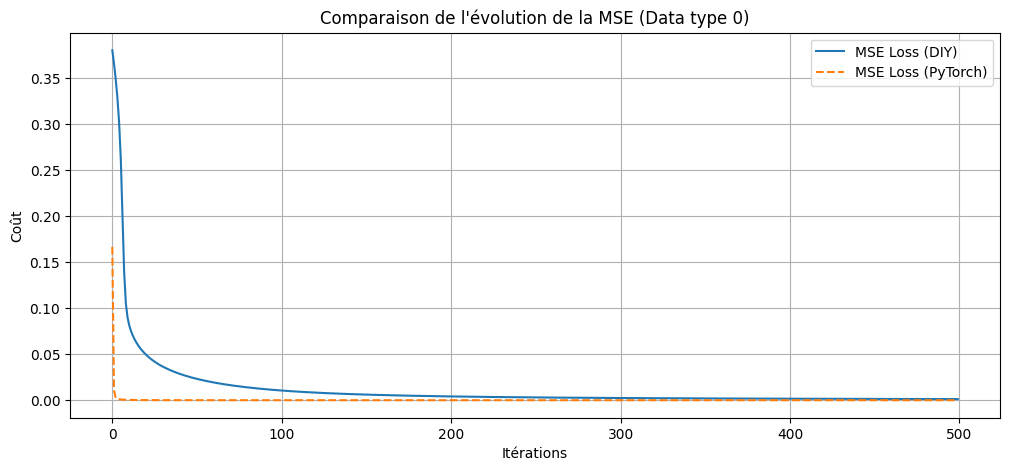

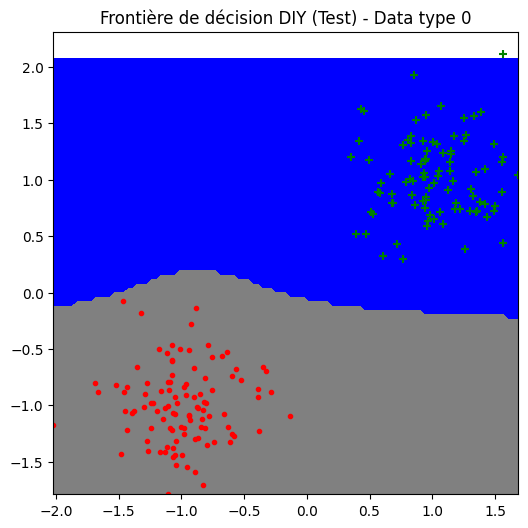

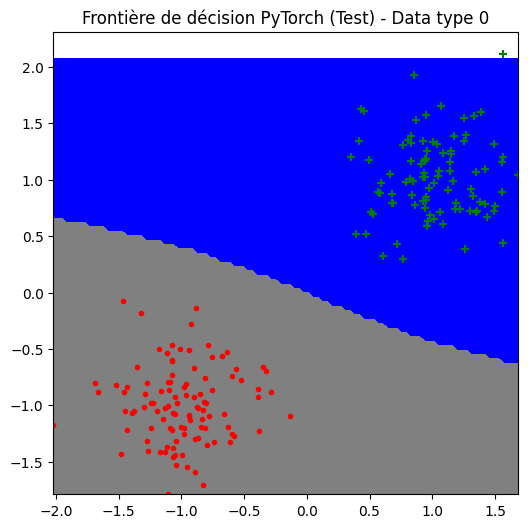

Test Loss DIY (Data type 0): 0.0013
Test Loss PyTorch (Data type 0): 0.0000
Epoch 0: Loss = 0.4824
Epoch 100: Loss = 0.1490
Epoch 200: Loss = 0.0454
Epoch 300: Loss = 0.0151
Epoch 400: Loss = 0.0091


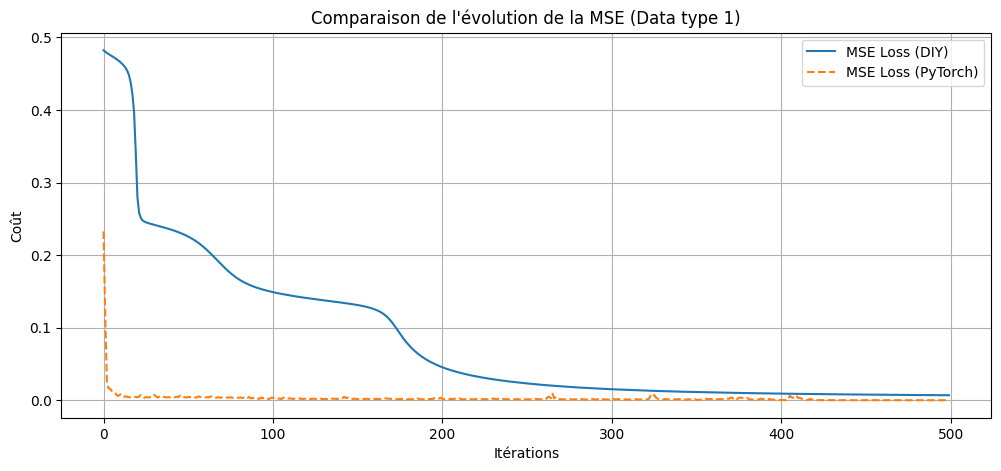

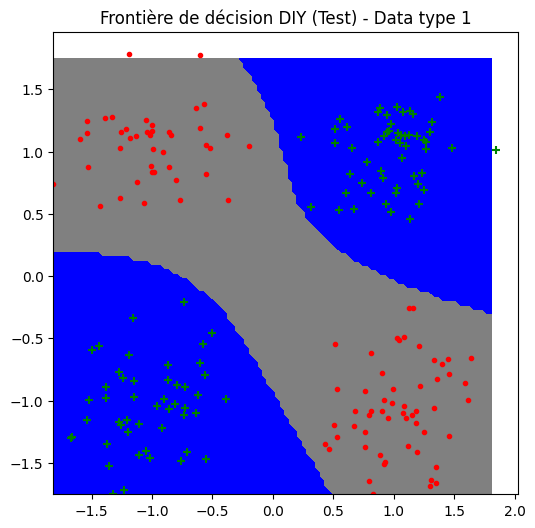

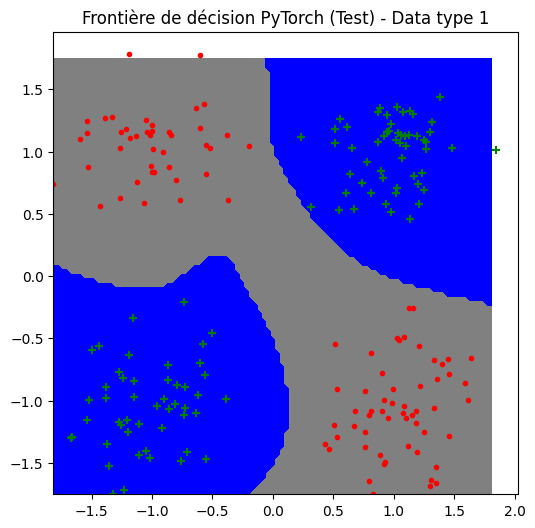

Test Loss DIY (Data type 1): 0.0043
Test Loss PyTorch (Data type 1): 0.0001
Epoch 0: Loss = 0.4011
Epoch 100: Loss = 0.2519
Epoch 200: Loss = 0.2431
Epoch 300: Loss = 0.2393
Epoch 400: Loss = 0.2363


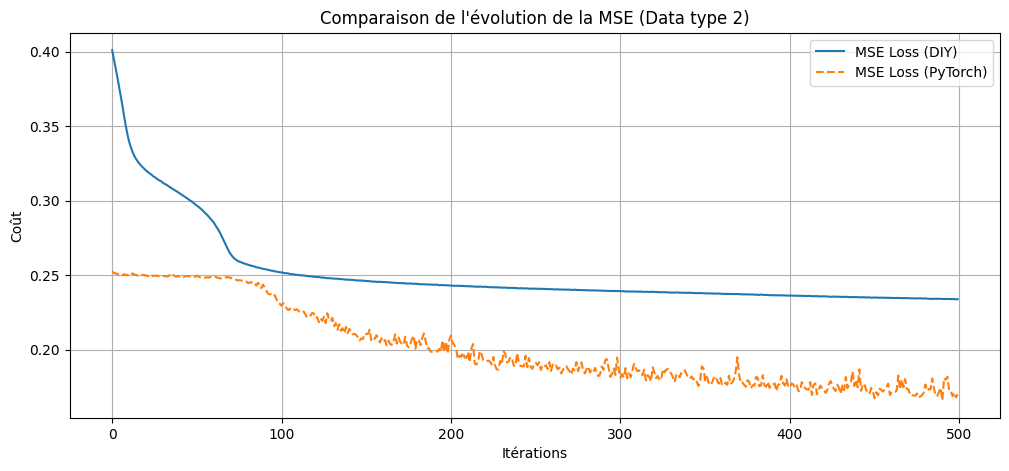

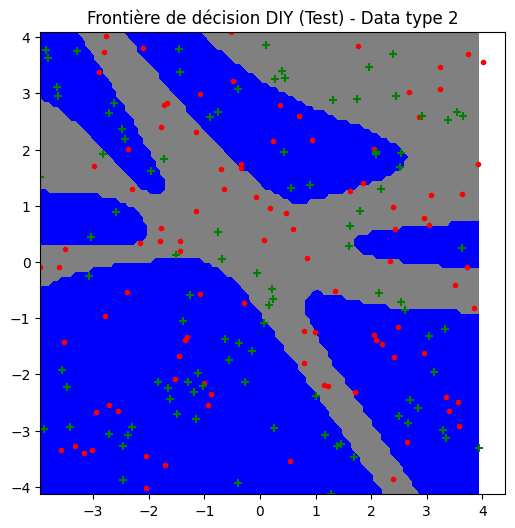

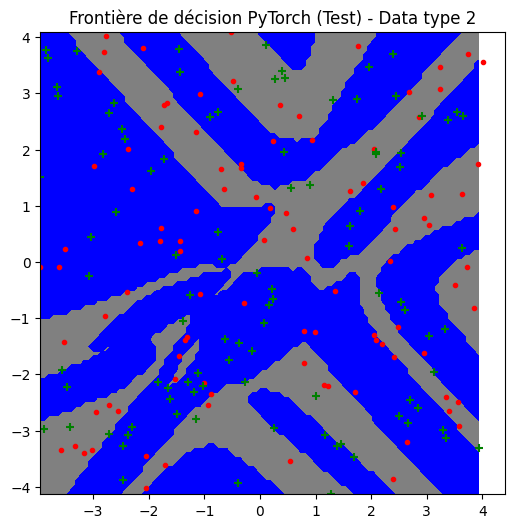

Test Loss DIY (Data type 2): 0.2286
Test Loss PyTorch (Data type 2): 0.2092
Epoch 0: Loss = 0.1872
Epoch 100: Loss = 0.0360
Epoch 200: Loss = 0.0196
Epoch 300: Loss = 0.0110
Epoch 400: Loss = 0.0070


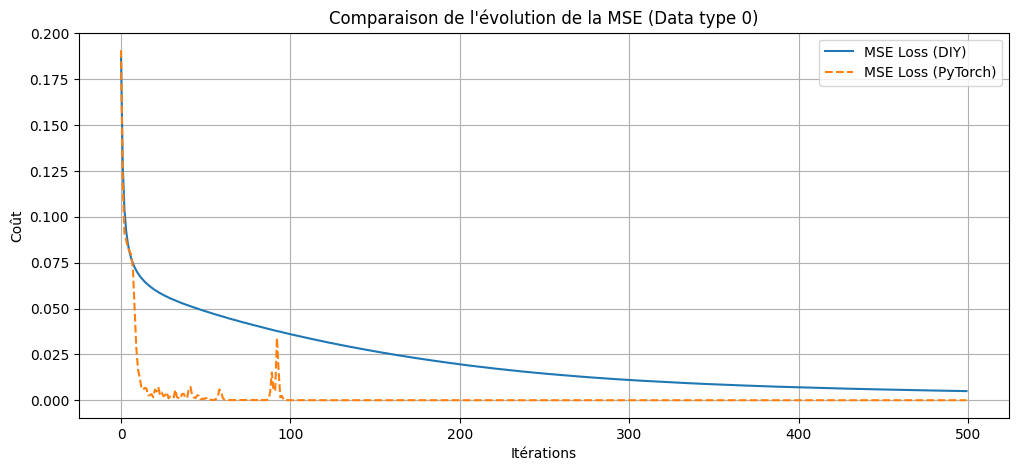

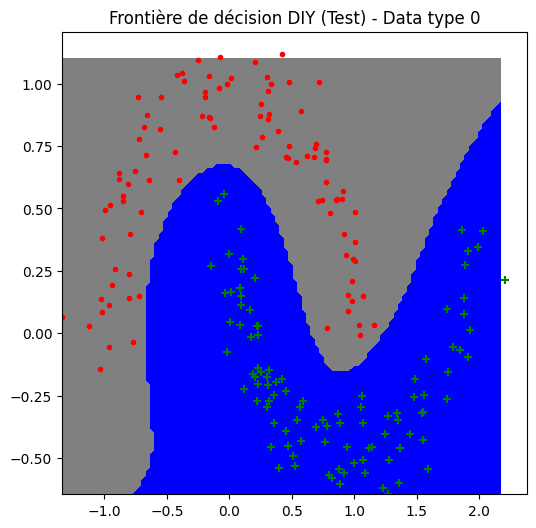

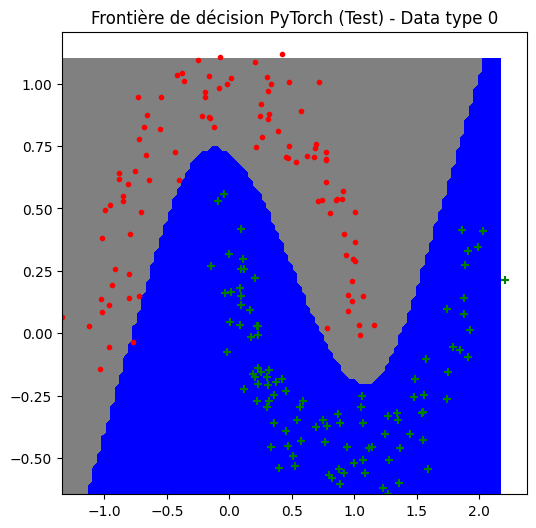

Test Loss DIY (Data type 0): 0.0048
Test Loss PyTorch (Data type 0): 0.0017
Epoch 0: Loss = 0.3112
Epoch 100: Loss = 0.1234
Epoch 200: Loss = 0.1189
Epoch 300: Loss = 0.1171
Epoch 400: Loss = 0.1161


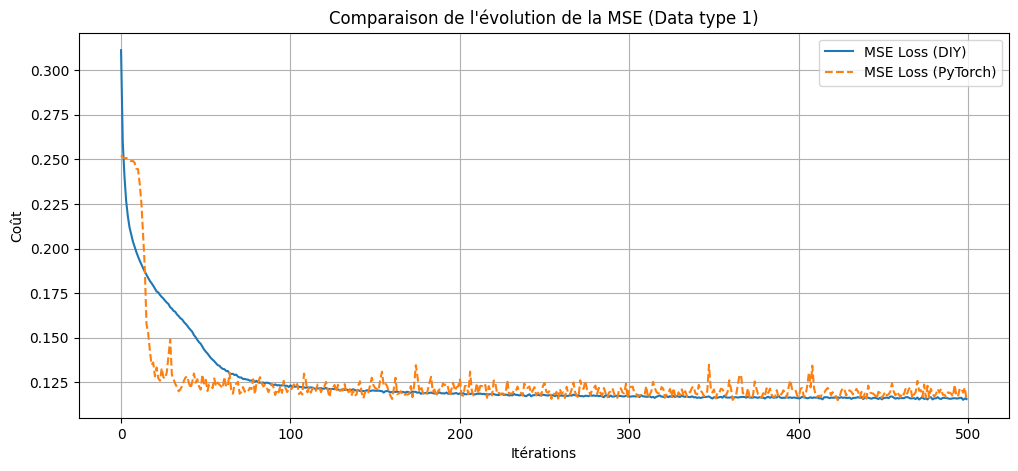

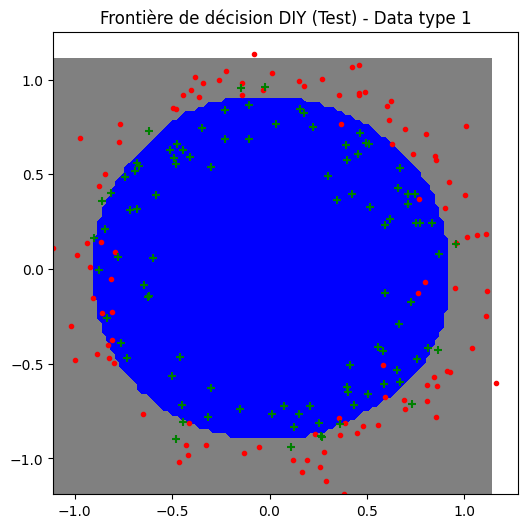

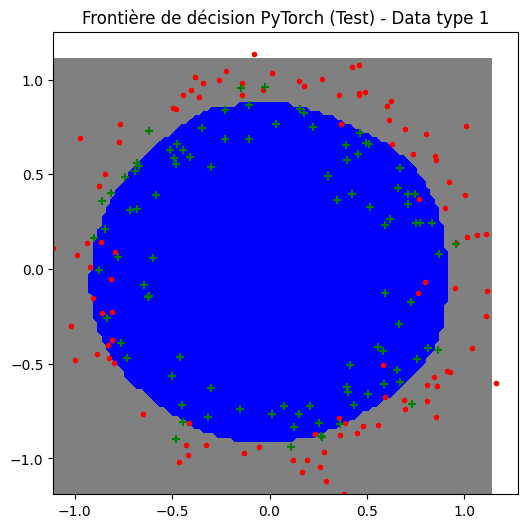

Test Loss DIY (Data type 1): 0.1075
Test Loss PyTorch (Data type 1): 0.1141
Epoch 0: Loss = 0.5257
Epoch 100: Loss = 0.0319
Epoch 200: Loss = 0.0257
Epoch 300: Loss = 0.0223
Epoch 400: Loss = 0.0213


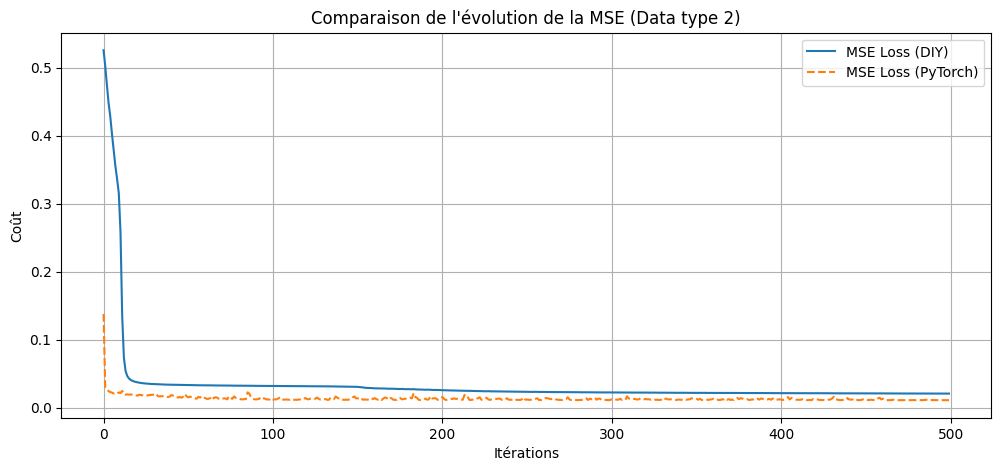

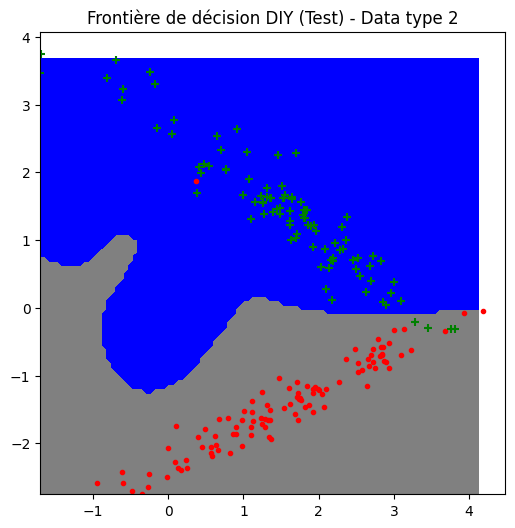

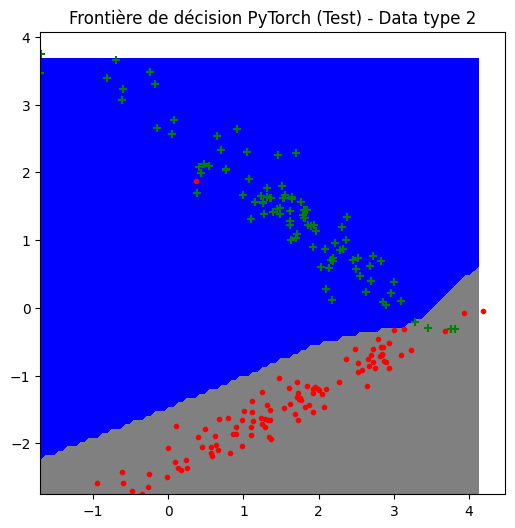

Test Loss DIY (Data type 2): 0.0216
Test Loss PyTorch (Data type 2): 0.0170


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

network = Sequentiel(
    Linear(2,5),
    TanH(),
    Linear(5, 10),
    TanH(),
    Linear(10, 5),
    TanH(),
    Linear(5, 1),
    Sigmoide()
)


class PyTorchNN(nn.Module):
    def __init__(self):
        super(PyTorchNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 5),
            nn.Tanh(),
            nn.Linear(5, 10),
            nn.Tanh(),
            nn.Linear(10, 5),
            nn.Tanh(),
            nn.Linear(5, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


def train_pytorch_nn(X, Y, model, loss_fn, optimizer, epochs=500, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)

    dataset = torch.utils.data.TensorDataset(X_tensor, Y_tensor)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for batch_X, batch_Y in dataloader:
            optimizer.zero_grad()
            output = model(batch_X)
            loss = loss_fn(output, batch_Y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(dataloader))
    
    return losses, model


for i in [0, 1, 2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = np.where(datay == -1, 0, 1).reshape((-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)

    # Modèle DIY
    model_diy = network
    loss_diy = MSELoss()
    losses_diy, trained_model_diy = train_nn(X_train, y_train, model_diy, loss_diy, epochs=500, lr=0.01, batch_size=32)

    # Modèle PyTorch
    model_torch = PyTorchNN()
    loss_torch = nn.MSELoss()
    optimizer = optim.Adam(model_torch.parameters(), lr=0.01)
    losses_torch, trained_model_torch = train_pytorch_nn(X_train, y_train, model_torch, loss_torch, optimizer, epochs=500, batch_size=32)

    y_pred_test_diy = trained_model_diy.forward(X_test)
    y_pred_test_torch = trained_model_torch(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()
    
    test_loss_diy = np.mean(loss_diy.forward(y_test, y_pred_test_diy))
    test_loss_torch = loss_torch(torch.tensor(y_pred_test_torch, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)).item()

    plt.figure(figsize=(12, 5))
    plt.plot(losses_diy, label="MSE Loss (DIY)")
    plt.plot(losses_torch, label="MSE Loss (PyTorch)", linestyle="dashed")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title(f"Comparaison de l'évolution de la MSE (Data type {i})")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(X_test, lambda x: np.round(trained_model_diy.forward(x)), step=100)
    plot_data(X_test, y_test)
    plt.title(f"Frontière de décision DIY (Test) - Data type {i}")
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(X_test, lambda x: np.round(trained_model_torch(torch.tensor(x, dtype=torch.float32)).detach().numpy()), step=100)
    plot_data(X_test, y_test)
    plt.title(f"Frontière de décision PyTorch (Test) - Data type {i}")
    plt.show()

    print(f"Test Loss DIY (Data type {i}): {test_loss_diy:.4f}")
    print(f"Test Loss PyTorch (Data type {i}): {test_loss_torch:.4f}")

for i in [0, 1, 2]:
    datax, datay = gen_arti2(data_type=i, epsilon=0.1)
    X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)

    # Modèle DIY
    model_diy = network
    loss_diy = MSELoss()
    losses_diy, trained_model_diy = train_nn(X_train, y_train, model_diy, loss_diy, epochs=500, lr=0.01, batch_size=32)

    # Modèle PyTorch
    model_torch = PyTorchNN()
    loss_torch = nn.MSELoss()
    optimizer = optim.Adam(model_torch.parameters(), lr=0.01)
    losses_torch, trained_model_torch = train_pytorch_nn(X_train, y_train, model_torch, loss_torch, optimizer, epochs=500, batch_size=32)

    y_pred_test_diy = trained_model_diy.forward(X_test)
    y_pred_test_torch = trained_model_torch(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()
    
    test_loss_diy = np.mean(loss_diy.forward(y_test, y_pred_test_diy))
    test_loss_torch = loss_torch(torch.tensor(y_pred_test_torch, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)).item()

    plt.figure(figsize=(12, 5))
    plt.plot(losses_diy, label="MSE Loss (DIY)")
    plt.plot(losses_torch, label="MSE Loss (PyTorch)", linestyle="dashed")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title(f"Comparaison de l'évolution de la MSE (Data type {i})")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(X_test, lambda x: np.round(trained_model_diy.forward(x)), step=100)
    plot_data(X_test, y_test)
    plt.title(f"Frontière de décision DIY (Test) - Data type {i}")
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(X_test, lambda x: np.round(trained_model_torch(torch.tensor(x, dtype=torch.float32)).detach().numpy()), step=100)
    plot_data(X_test, y_test)
    plt.title(f"Frontière de décision PyTorch (Test) - Data type {i}")
    plt.show()

    print(f"Test Loss DIY (Data type {i}): {test_loss_diy:.4f}")
    print(f"Test Loss PyTorch (Data type {i}): {test_loss_torch:.4f}")

    
